# Convolution
**Author**: James Chen, School of Animal Sciences, Virginia Tech

**Date**: Aug 03, 2022

## **Set up the environment**
### Clone the repository (demo data and scripts)

In [1]:
# use a exclamation mark, "!", to call Shell command in Python
# !git clone https://github.com/vt-ads/intro_to_phenomics

Cloning into 'intro_to_phenomics'...
remote: Enumerating objects: 344, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 344 (delta 10), reused 23 (delta 8), pack-reused 311
Receiving objects: 100% (344/344), 67.70 MiB | 17.04 MiB/s, done.
Resolving deltas: 100% (118/118), done.


### Change the working directory

In [2]:
import os
# change WD
os.chdir("/content/intro_to_phenomics")
# print WD
print("Current folder: ", os.getcwd())

Current folder:  /content/intro_to_phenomics


## **Formula**

<center><img src="https://github.com/vt-ads/intro_to_phenomics/blob/main/res/l05/convolve.png?raw=1" width="700"/></center>

$$
g(i, j) = \sum \limits_{k, l} f(i + k, j + l) h(k, l)
$$


## **Data**

In [4]:
from modules.image_handler import load_img
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

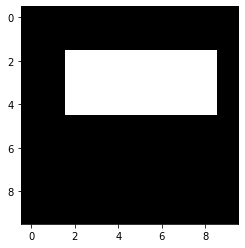

In [12]:
# start from a simple image
img = np.zeros((10, 10))
img[2:5, 2:9] = 1
plt.imshow(img, cmap="gray")

### Sobel filtering (X direction)

Text(0.5, 1.0, 'sobel x (SciPy)')

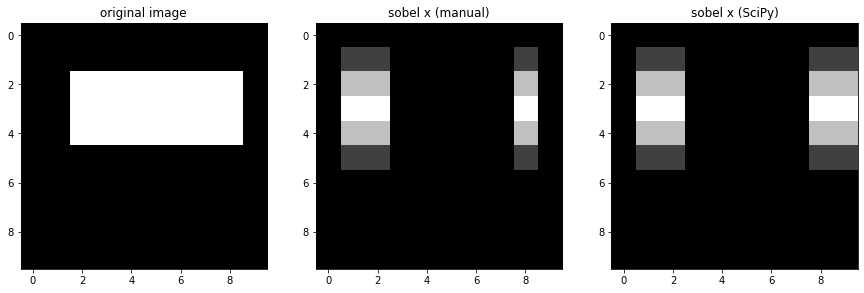

In [13]:
kernel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]]) / 8

# manually compute convolutional operation
img_x_manual = np.zeros(img.shape)
for x in range(1, 9):
    for y in range(1, 9):
        mat = img[(y - 1):(y + 2), (x - 1):(x + 2)] * kernel_x
        img_x_manual[y, x] = np.sum(mat)

# use a SciPy function
img_x_scipy = convolve2d(img, kernel_x, mode="same")

# plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("original image")
axes[1].imshow(abs(img_x_manual), cmap="gray")
axes[1].set_title("sobel x (manual)")
axes[2].imshow(abs(img_x_scipy), cmap="gray")
axes[2].set_title("sobel x (SciPy)")

### Sobel filtering (Y direction)

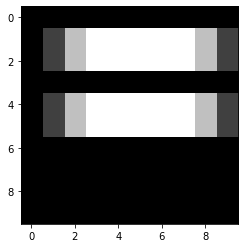

In [14]:
kernel_y = np.array([[-1, -2, -1],
                     [0,   0,  0],
                     [1,   2,  1]]) / 8
img_y_scipy = convolve2d(img, kernel_y, mode="same")
plt.imshow(abs(img_y_scipy), cmap="gray")

Text(0.5, 1.0, 'Edge detection (threshold = 0.5)')

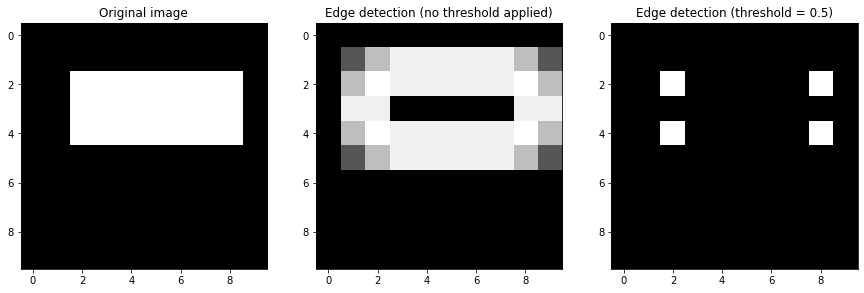

In [15]:
# root sum squared
img_new = ((img_x_scipy)**2 + (img_y_scipy)**2)**.5

# plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
axes[0].imshow(img, cmap="gray")
axes[0].set_title("Original image")
axes[1].imshow(img_new, cmap="gray")
axes[1].set_title("Edge detection (no threshold applied)")
axes[2].imshow(img_new > .5, cmap="gray")
axes[2].set_title("Edge detection (threshold = 0.5)")

## **Work with a real image**

In [16]:
def convolve_edge(img):
    k_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]]) / 8
    k_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]]) / 8
    imgc_x = convolve2d(img, k_x, mode="same")
    imgc_y = convolve2d(img, k_y, mode="same")
    img_new = ((imgc_x)**2 + (imgc_y)**2 )**.5
    return img_new

def convolve_edge(img):  # use imaginary numbers (j)
    k = np.array([[-1 - 1j, 0 - 2j, 1 - 1j],
                  [-2 + 0j, 0 + 0j, 2 + 0j],
                  [-1 + 1j, 0 + 2j, 1 + 1j]]) / 8
    imgc = convolve2d(img, k, mode="same")
    return abs(imgc)

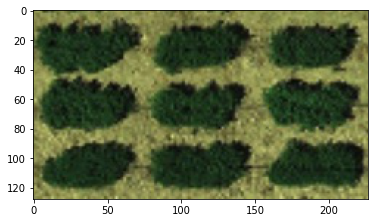

In [18]:
img = load_img("data/plots.jpg")
plt.imshow(img)

Text(0.5, 1.0, 'Edge detection (threshold = q80)')

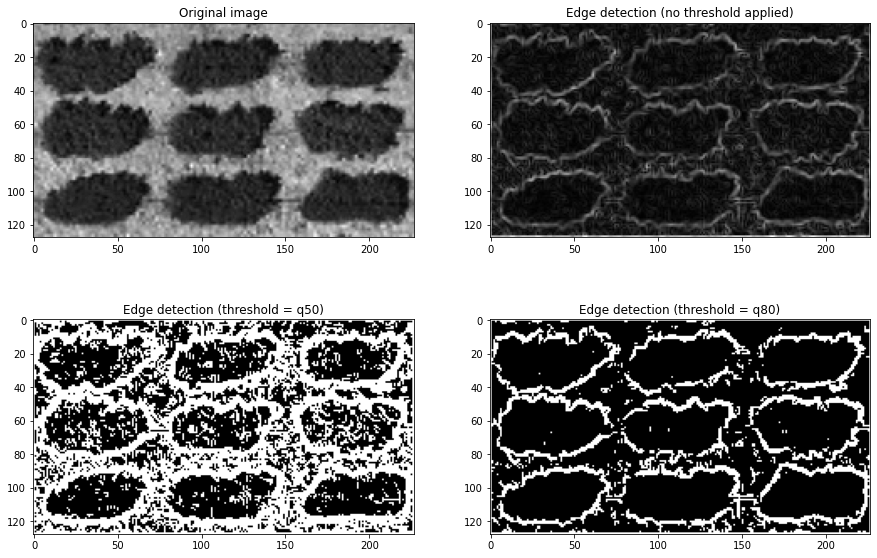

In [19]:
imgbw = img.mean(axis=2).astype(int)
imgc  = convolve_edge(imgbw)
# plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes[0, 0].imshow(imgbw, cmap="gray")
axes[0, 0].set_title("Original image")
axes[0, 1].imshow(imgc, cmap="gray")
axes[0, 1].set_title("Edge detection (no threshold applied)")
axes[1, 0].imshow(imgc > np.quantile(imgc, .5), cmap="gray")
axes[1, 0].set_title("Edge detection (threshold = q50)")
axes[1, 1].imshow(imgc > np.quantile(imgc, .8), cmap="gray")
axes[1, 1].set_title("Edge detection (threshold = q80)")

### Edge kernel

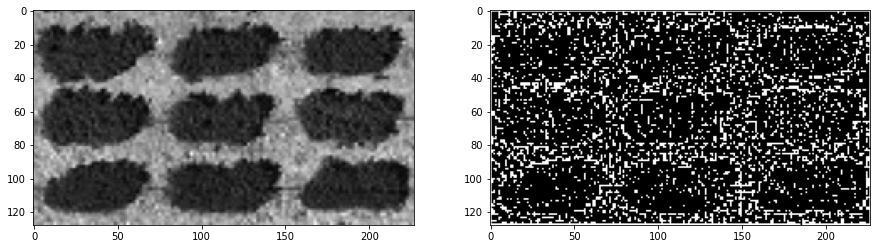

In [20]:
k_edge = np.array((
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]),
    dtype='int')

imgc = convolve2d(imgbw, k_edge, mode="same")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].imshow(imgbw, cmap="gray")
axes[1].imshow(imgc > np.quantile(imgc, .8), cmap="gray")


### Shapen kernel

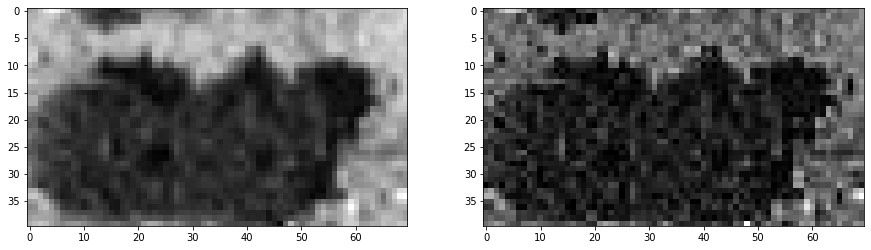

In [21]:
k_shp = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]),
    dtype='int')
imgc = convolve2d(imgbw, k_shp, mode="same")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].imshow(imgbw[40:80, 80:150], cmap="gray")
axes[1].imshow(abs(imgc)[40:80, 80:150], cmap="gray")

### Gaussian kernel

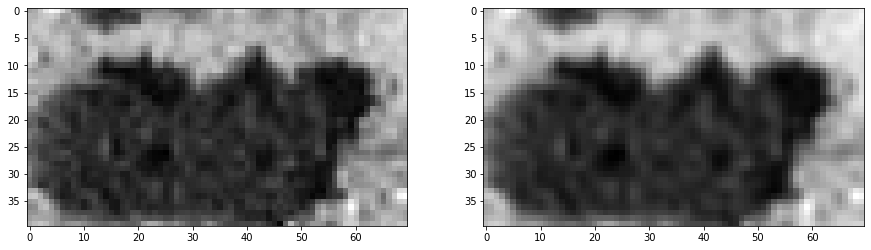

In [22]:
k_gauss = np.array((
    [1, 4, 1],
    [4, 9, 4],
    [1, 4, 1]),
    dtype='int') / 29

imgc = convolve2d(imgbw, k_gauss, mode="same")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].imshow(imgbw[40:80, 80:150], cmap="gray")
axes[1].imshow(abs(imgc)[40:80, 80:150], cmap="gray")